## Analysis of Log Transfomed Data from DESeq2

Layout and ideas addapted from [Jake VanderPlas, Reproducible Data Analysis in Jupyter](https://github.com/jakevdp/JupyterWorkflow/blob/master/Videos.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [2]:
INFILE = '../data/RLD_2015_Timepoints_RNA_B_shuf01_reordered.tsv'

### Load and traspose date

In [3]:
data = pd.read_csv(INFILE, sep='\t', index_col='gene')
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
gene,,,,,,,,,,,,,
contig__1960737,-1.893518,-1.898566,-1.895969,-1.863964,-1.896146,-1.896616,-1.898927,-1.866729,-1.896509,-1.897111,-1.892305,-1.889785,-1.893318
contig__644693,-1.439131,-1.579264,-1.575644,-1.574668,-1.487105,-1.576546,-1.579767,-1.493405,-1.576396,-1.577236,-1.570537,-1.567025,-1.571949
contig__2540992,-1.349415,-1.296085,-1.354313,-1.352914,-1.354664,-1.287496,-1.358179,-1.358136,-1.355390,-1.356594,-1.346991,-1.341956,-1.349015
contig__3910698,-1.892596,-1.896831,-1.841723,-1.894065,-1.868555,-1.867989,-1.897133,-1.896905,-1.867054,-1.895610,-1.891579,-1.889465,-1.892428
contig__229668,-1.893533,-1.898595,-1.831979,-1.895289,-1.896168,-1.896640,-1.898956,-1.898683,-1.896532,-1.897136,-1.892317,-1.857914,-1.861456


In [4]:
transposed = data.T
transposed.shape
transposed.head()

gene,contig__1960737,contig__644693,contig__2540992,contig__3910698,contig__229668,contig__185112,contig__3334960,contig__418136,contig__2358051,contig__3246611,...,contig__2486794,contig__3280986,NW_008634170.1,contig__381931,contig__2350898,contig__170478,contig__3905588,contig__3324316,contig__2242794,contig__3981114
1,-1.893518,-1.439131,-1.349415,-1.892596,-1.893533,-1.678936,-0.693196,-1.785058,-1.041539,0.626328,...,-1.893047,-1.678005,-1.636695,-1.785360,-1.677653,-1.676703,-0.993996,-0.657042,-1.492027,-0.631809
2,-1.898566,-1.579264,-1.296085,-1.896831,-1.898595,-1.685309,-0.658918,-1.791039,-1.043965,0.573068,...,-1.897680,-1.685505,-1.682233,-1.791560,-1.684935,-1.683400,-0.995966,-0.658565,-1.500854,-0.633311
3,-1.895969,-1.575644,-1.354313,-1.841723,-1.831979,-1.682030,-0.655935,-1.787962,-1.043359,0.575876,...,-1.895297,-1.633947,-1.679017,-1.788371,-1.681189,-1.679955,-0.995390,-0.515894,-1.496313,-0.632586
4,-1.863964,-1.574668,-1.352914,-1.894065,-1.895289,-1.637228,-0.672210,-1.787133,-1.043181,0.659877,...,-1.863223,-1.680607,-1.678150,-1.787511,-1.680179,-1.679026,-0.995221,-0.657615,-1.495089,-0.632374
5,-1.896146,-1.487105,-1.354664,-1.868555,-1.896168,-1.682252,-0.694249,-1.788171,-0.857312,0.710307,...,-1.895459,-1.681909,-1.679235,-1.788587,-1.681443,-1.680188,-0.995431,-0.583998,-1.496621,-0.568844


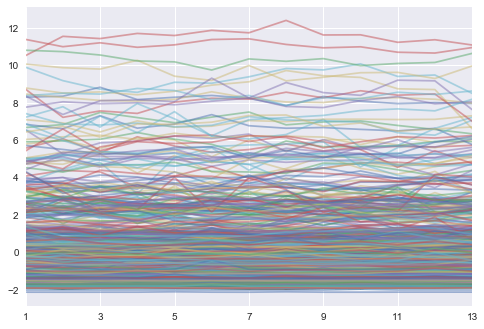

In [5]:
transposed.plot(legend=False, alpha=0.5);

### Reduce Dimentionality with Principle Component Analysis

In [6]:
X = transposed.T.values
X.shape

(1218, 13)

In [7]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [8]:
X2.shape

(1218, 2)

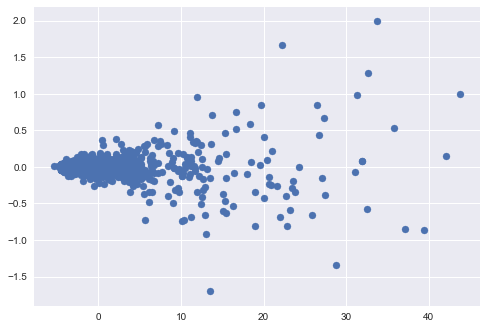

In [9]:
plt.scatter(X2[:, 0], X2[:, 1])

### Predict Clusters with Gaussian Mixture Models

In [10]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0])

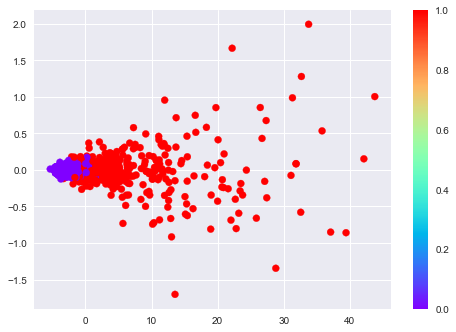

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow');
plt.colorbar()

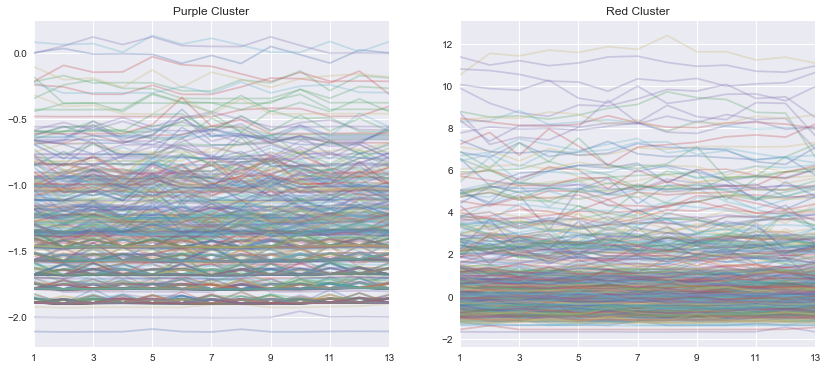

In [12]:
fix, ax = plt.subplots(1, 2, figsize=(14, 6))
transposed.T[labels == 0].T.plot(legend=False, alpha=0.3, ax=ax[0]);
transposed.T[labels == 1].T.plot(legend=False, alpha=0.3, ax=ax[1]);

ax[0].set_title('Purple Cluster');
ax[1].set_title('Red Cluster');